In [211]:
import folium
import pandas as pd

In [ ]:
latitude = 114.93301408
longitude = 22.73810740

In [228]:
city_map = folium.Map(location=[22.7, 114.9], zoom_start=10, tiles='Stamen Terrain')
# display city map
city_map

In [ ]:
city_map.

In [221]:
# San Francisco latitude and longitude values
latitude = 114.93301408
longitude = 22.73810740

# Create map and display it
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
san_map

In [216]:
# get the first 200 crimes in the cdata
limit = 200
data = cdata.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(cdata.Y, data.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)

NameError: name 'cdata' is not defined

In [ ]:
# add pop-up text to each marker on the map
latitudes = list(data.Y)
longitudes = list(data.X)
labels = list(data.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(san_map)    
    
# add incidents to map
san_map.add_child(incidents)

In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(san_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(data.Y, data.X, cdata.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# add incidents to map
san_map.add_child(incidents)

In [ ]:
import json
import requests

url = 'https://cocl.us/sanfran_geojson'
san_geo = f'{url}'
san_map = folium.Map(location=[37.77, -122.4], zoom_start=12)
folium.GeoJson(
    san_geo,
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(san_map)

#display map
san_map

In [ ]:
# Count crime numbers in each neighborhood
disdata = pd.DataFrame(cdata['PdDistrict'].value_counts())
disdata.reset_index(inplace=True)
disdata.rename(columns={'index':'Neighborhood','PdDistrict':'Count'},inplace=True)
disdata

In [ ]:
san_map = folium.Map(location=[37.77, -122.4], zoom_start=12)

# Create Choropleth map
folium.Choropleth(
    geo_data=san_geo,
    data=disdata,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    #fill_color='red',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Crime Counts in San Francisco'
).add_to(san_map)

san_map

In [ ]:
san_map = folium.Map(location=[37.77, -122.4], zoom_start=12)

# Create Choropleth map
folium.Choropleth(
    geo_data=san_geo,
    data=disdata,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    #fill_color='red',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Crime Counts in San Francisco'
).add_to(san_map)

san_map

In [ ]:
from folium.plugins import HeatMap

# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# Convert data format
heatdata = data[['Y','X']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(san_map)

san_map

### 1.拿到数据路径

In [10]:
path = r'D:\TOF-Ms DATA\Liuhe\STD_mzml\*.mzML'
files_mzml = glob(path)

In [13]:
files_mzml[-1]

'D:\\TOF-Ms DATA\\Liuhe\\STD_mzml\\LC-2021-10-18-STD-9-3.mzML'

## 2. 分离ms1,ms2,lockspray

In [15]:
ms1,ms2,lockspary = sep_scans(files_mzml[-1],'Waters')

 Reading files finished! Total time: 44.53 s           

## 3. 生成标准的DataFrame

In [27]:
df1 = gen_df_raw(ms1)

 Concat finished, Consumed time: 184.84 s                     

In [36]:
rt,eic = extract(df1,264.1123,50)

In [40]:
df1.memory_usage().sum()/1024/1024/1024

6.096376597881317

## 4. 找到所有可能的峰

In [78]:
peak_all = peak_picking(df1)

 finding peaks...100.0%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [79]:
peak_all 

,rt,mz,intensity
0,13.02,52.5495,557.0
1,23.57,52.9596,411.0
2,20.42,53.7171,348.0
3,17.85,57.0664,528.0
4,17.81,57.0695,677.0
...,...,...,...
15081,22.38,999.2883,16891.0
15082,23.86,999.2819,917.0
15083,20.74,999.3336,4597.0
15084,22.39,999.3336,4870.0


In [82]:
peak_selected = peak_checking(peak_all, df1)

 Processing peaks...15086/15086                        

In [83]:
peak_selected

,rt,mz,intensity,SN_left,SN_right,area
0,11.93,377.7338,501.0,38.9,29.5,20158
1,20.12,256.3768,503.0,48.3,48.3,17628
2,18.32,332.4599,504.0,1.0,37.2,9079
3,18.41,287.3706,510.0,41.2,40.7,24001
4,18.31,374.5399,522.0,49.2,48.7,20430
...,...,...,...,...,...,...
304,22.50,538.1646,669589.0,49.6,49.6,27243233
305,23.54,612.1824,909969.0,20.5,20.5,43645849
306,22.50,537.1684,1023818.0,46.5,46.5,38259138
307,22.50,536.1684,1986146.0,39.0,39.0,71345271


## 5. 做peak_alignment

In [103]:
files_excel = glob('H:\JM\*.xlsx')

In [112]:
peak_alignment(files_excel)

 for 19 files, generating alignment results...  

In [106]:
peak_ref = gen_ref(files_excel)

  0                                             

In [108]:
peak_ref

array([[ 20.05  , 160.1549],
       [  8.77  , 258.3403],
       [  9.14  , 236.6714],
       ...,
       [ 14.27  , 199.3063],
       [  9.88  , 283.7029],
       [ 18.53  , 286.5146]])

In [109]:
peak_ref = pd.DataFrame(peak_ref,columns = ['rt','mz'])

In [114]:
peak_ref.to_excel(r'H:\JM\peak_ref.xlsx')

## 6. 做峰面积比较，找到目标化合物

In [118]:
path = r'G:\广东省重点海域非靶向调查-202109\LC-2109-pos\HHW\mzML\step2\*.xlsx'

In [119]:
files_excel_area = glob(path)

In [122]:
final_data = concat_alignment(files_excel_area)

In [144]:
new_data =final_data[final_data.columns[6:12]]

In [153]:
new_data1 = (new_data+1).apply(np.log)

In [147]:
import seaborn as sns

In [149]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [156]:
path = r'H:\JM\*.xlsx'

In [157]:
files_excel = glob(path)

In [165]:
final_data = concat_alignment(files_excel)

 19/19

In [166]:
final_data.to_excel( r'H:\JM\final_data.xlsx')

### 7.解析DDA数据

In [167]:
path = r'H:\YYN\DAY0-DDA\*.mzML'

In [169]:
files_DDA = glob(path)
files_DDA[6]

'H:\\YYN\\DAY0-DDA\\LC-2021-11-04-pos-DDA-PoolDay0-3.mzML'

In [171]:
run = pymzml.run.Reader(files_DDA[6])

In [173]:
scans = []
for scan in run:
    scans.append(scan)

In [190]:
%matplotlib inline

[{'mz': 141.96}]

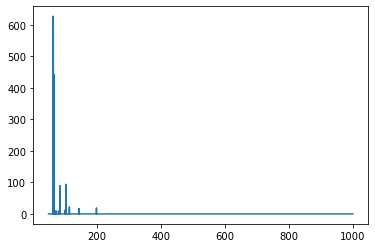

In [193]:
plt.plot(scans[4].mz,scans[4].i)
scans[4].selected_precursors

In [184]:
for scan in scans:
    print(scan.id_dict)

{'function': 7, 'process': 0, 'scan': 1}
{'function': 1, 'process': 0, 'scan': 1}
{'function': 2, 'process': 0, 'scan': 1}
{'function': 3, 'process': 0, 'scan': 1}
{'function': 4, 'process': 0, 'scan': 1}
{'function': 5, 'process': 0, 'scan': 1}
{'function': 6, 'process': 0, 'scan': 1}
{'function': 1, 'process': 0, 'scan': 2}
{'function': 2, 'process': 0, 'scan': 2}
{'function': 3, 'process': 0, 'scan': 2}
{'function': 4, 'process': 0, 'scan': 2}
{'function': 5, 'process': 0, 'scan': 2}
{'function': 6, 'process': 0, 'scan': 2}
{'function': 1, 'process': 0, 'scan': 3}
{'function': 2, 'process': 0, 'scan': 3}
{'function': 3, 'process': 0, 'scan': 3}
{'function': 4, 'process': 0, 'scan': 3}
{'function': 5, 'process': 0, 'scan': 3}
{'function': 6, 'process': 0, 'scan': 3}
{'function': 1, 'process': 0, 'scan': 4}
{'function': 2, 'process': 0, 'scan': 4}
{'function': 3, 'process': 0, 'scan': 4}
{'function': 4, 'process': 0, 'scan': 4}
{'function': 5, 'process': 0, 'scan': 4}
{'function': 6, 

{'function': 2, 'process': 0, 'scan': 183}
{'function': 3, 'process': 0, 'scan': 183}
{'function': 4, 'process': 0, 'scan': 183}
{'function': 5, 'process': 0, 'scan': 183}
{'function': 6, 'process': 0, 'scan': 168}
{'function': 1, 'process': 0, 'scan': 186}
{'function': 2, 'process': 0, 'scan': 184}
{'function': 3, 'process': 0, 'scan': 184}
{'function': 4, 'process': 0, 'scan': 184}
{'function': 5, 'process': 0, 'scan': 184}
{'function': 6, 'process': 0, 'scan': 169}
{'function': 1, 'process': 0, 'scan': 187}
{'function': 2, 'process': 0, 'scan': 185}
{'function': 3, 'process': 0, 'scan': 185}
{'function': 4, 'process': 0, 'scan': 185}
{'function': 5, 'process': 0, 'scan': 185}
{'function': 6, 'process': 0, 'scan': 170}
{'function': 1, 'process': 0, 'scan': 188}
{'function': 2, 'process': 0, 'scan': 186}
{'function': 3, 'process': 0, 'scan': 186}
{'function': 4, 'process': 0, 'scan': 186}
{'function': 5, 'process': 0, 'scan': 186}
{'function': 7, 'process': 0, 'scan': 39}
{'function':

{'function': 1, 'process': 0, 'scan': 402}
{'function': 2, 'process': 0, 'scan': 397}
{'function': 3, 'process': 0, 'scan': 397}
{'function': 4, 'process': 0, 'scan': 397}
{'function': 5, 'process': 0, 'scan': 397}
{'function': 6, 'process': 0, 'scan': 382}
{'function': 1, 'process': 0, 'scan': 403}
{'function': 2, 'process': 0, 'scan': 398}
{'function': 3, 'process': 0, 'scan': 398}
{'function': 4, 'process': 0, 'scan': 398}
{'function': 5, 'process': 0, 'scan': 398}
{'function': 6, 'process': 0, 'scan': 383}
{'function': 7, 'process': 0, 'scan': 83}
{'function': 1, 'process': 0, 'scan': 404}
{'function': 2, 'process': 0, 'scan': 399}
{'function': 3, 'process': 0, 'scan': 399}
{'function': 4, 'process': 0, 'scan': 399}
{'function': 5, 'process': 0, 'scan': 399}
{'function': 6, 'process': 0, 'scan': 384}
{'function': 1, 'process': 0, 'scan': 405}
{'function': 2, 'process': 0, 'scan': 400}
{'function': 3, 'process': 0, 'scan': 400}
{'function': 4, 'process': 0, 'scan': 400}
{'function':

{'function': 5, 'process': 0, 'scan': 613}
{'function': 6, 'process': 0, 'scan': 598}
{'function': 1, 'process': 0, 'scan': 627}
{'function': 2, 'process': 0, 'scan': 614}
{'function': 3, 'process': 0, 'scan': 614}
{'function': 4, 'process': 0, 'scan': 614}
{'function': 5, 'process': 0, 'scan': 614}
{'function': 6, 'process': 0, 'scan': 599}
{'function': 1, 'process': 0, 'scan': 628}
{'function': 7, 'process': 0, 'scan': 128}
{'function': 2, 'process': 0, 'scan': 615}
{'function': 3, 'process': 0, 'scan': 615}
{'function': 4, 'process': 0, 'scan': 615}
{'function': 5, 'process': 0, 'scan': 615}
{'function': 6, 'process': 0, 'scan': 600}
{'function': 1, 'process': 0, 'scan': 629}
{'function': 2, 'process': 0, 'scan': 616}
{'function': 3, 'process': 0, 'scan': 616}
{'function': 4, 'process': 0, 'scan': 616}
{'function': 5, 'process': 0, 'scan': 616}
{'function': 6, 'process': 0, 'scan': 601}
{'function': 1, 'process': 0, 'scan': 630}
{'function': 2, 'process': 0, 'scan': 617}
{'function'

{'function': 3, 'process': 0, 'scan': 816}
{'function': 4, 'process': 0, 'scan': 816}
{'function': 5, 'process': 0, 'scan': 816}
{'function': 6, 'process': 0, 'scan': 801}
{'function': 1, 'process': 0, 'scan': 843}
{'function': 2, 'process': 0, 'scan': 817}
{'function': 3, 'process': 0, 'scan': 817}
{'function': 4, 'process': 0, 'scan': 817}
{'function': 5, 'process': 0, 'scan': 817}
{'function': 6, 'process': 0, 'scan': 802}
{'function': 1, 'process': 0, 'scan': 844}
{'function': 2, 'process': 0, 'scan': 818}
{'function': 3, 'process': 0, 'scan': 818}
{'function': 4, 'process': 0, 'scan': 818}
{'function': 5, 'process': 0, 'scan': 818}
{'function': 6, 'process': 0, 'scan': 803}
{'function': 1, 'process': 0, 'scan': 845}
{'function': 2, 'process': 0, 'scan': 819}
{'function': 3, 'process': 0, 'scan': 819}
{'function': 4, 'process': 0, 'scan': 819}
{'function': 5, 'process': 0, 'scan': 819}
{'function': 6, 'process': 0, 'scan': 804}
{'function': 1, 'process': 0, 'scan': 846}
{'function'